# Andmeanalüüs lõputöö „Soolised erinevused kursuse „Objektorienteeritud programmeerimine“ läbimisel“ jaoks

### Pärl Pind
### Tartu 2025


## Eeltöötlus

Vajalike teekide importimine, süvendusrühma ja eeleksami läbinute eemaldamine.

### Impordid

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter

from scipy.stats import shapiro, mannwhitneyu, chi2_contingency 

### Andmestiku lugemine ja töötlemine

In [2]:
df = pd.read_excel("andmestik.xlsx")
algne = df.copy()

Süvendusrühma tulemused ja eeleksami sooritajate eemaldamine

In [3]:
df = df[(df['Unnamed: 3'] != '17. rühm - süvendusrühm') & (df['Unnamed: 3'] != '18. rühm - eeleksam')]

Peale süvendusrühma ja eeleksami sooritajate eemaldamist on mehi 200 ja naisi 94, enne oli 225 meest ja 98 naist

## Analüüs

### Praktikumipunktid

Praktikumipunktid ehk praktikumis osalemise ja kodutööde eest saadud punktid. Maksimaalne punktisumma praktikumipunktide eest oli 12 punkti, millest praktikumides osalemine andis 6,5 ja kodutöös 5,5. 

Praktikumipunktid - kodutööd ja osalemine kokku

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 5.650986067431106e-14
Ei ole normaaljaotus

Mehed -  mediaan: 9.6, keskmine: 8.67, standardhälve: 2.96
Naised - mediaan: 10.1, keskmine: 9.19, standardhälve: 2.64

Mann-Whitney test - U-stat: 8483.5 p-value: 0.199


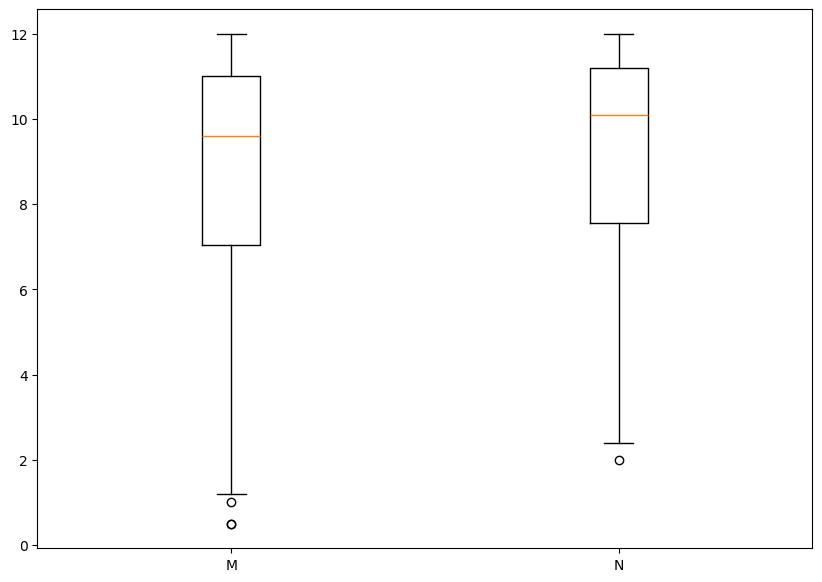

In [4]:
tulp = 'Kodutööd ja osalemine kokku (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

print("Praktikumipunktid - kodutööd ja osalemine kokku")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Praktikumides osalemine

Praktikumides osalemise eest oli kokku võimalik saada 6,5 punkti. Kokku oli 12 praktikumi, esimese praktikumi eest oli võimalik saada 1 punkt, ülejäänude eest 0,5 punkti.

Praktikumides osalemine

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 1.4285235801734397e-16
Ei ole normaaljaotus

Mehed -  mediaan: 5.5, keskmine: 4.86, standardhälve: 1.66
Naised - mediaan: 6.0, keskmine: 5.3, standardhälve: 1.47

Mann-Whitney test - U-stat: 7736.5 p-value: 0.013
      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05


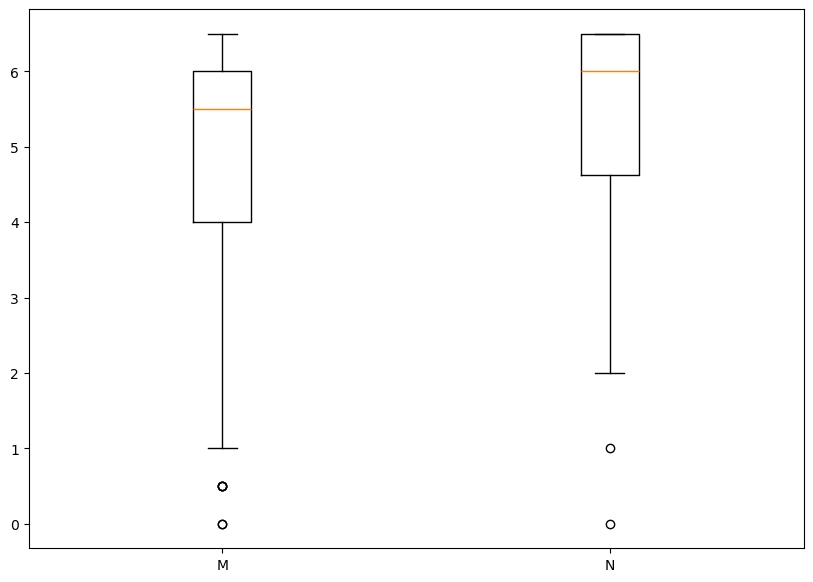

In [5]:
# Praktikumides osalemine

# Praktikumides osalemise punktide tulpade kombineerimine üheks tulbaks
dfcopy = df.copy()
dfcopy["Praktikumides osalemine"] = dfcopy.filter(like='praktikum ').apply(pd.to_numeric, errors='coerce').sum(axis=1)
tulp = 'Praktikumides osalemine'
dfcopy = dfcopy[['Sugu', tulp]].copy()

print("Praktikumides osalemine")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

Selleks, et arvutada, mitmes praktikumis üliõpilased keskmiselt osalesid, eeldatakse, et kui üliõpilane sai praktikumis osalemise eest rohkem kui 0 punkti, siis ta osales praktikumis. Kuna esimeses praktikumis oli võimalik saada 0,5 punkti asemel 1 punkt, tehakse järgmises koodiplokis kõik praktikumid võrdse kaaluga.

Keskmine praktikumides osalemine

Mehed -  mediaan: 10.0, keskmine: 8.86, standardhälve: 3.2
Naised - mediaan: 11.0, keskmine: 9.74, standardhälve: 2.74


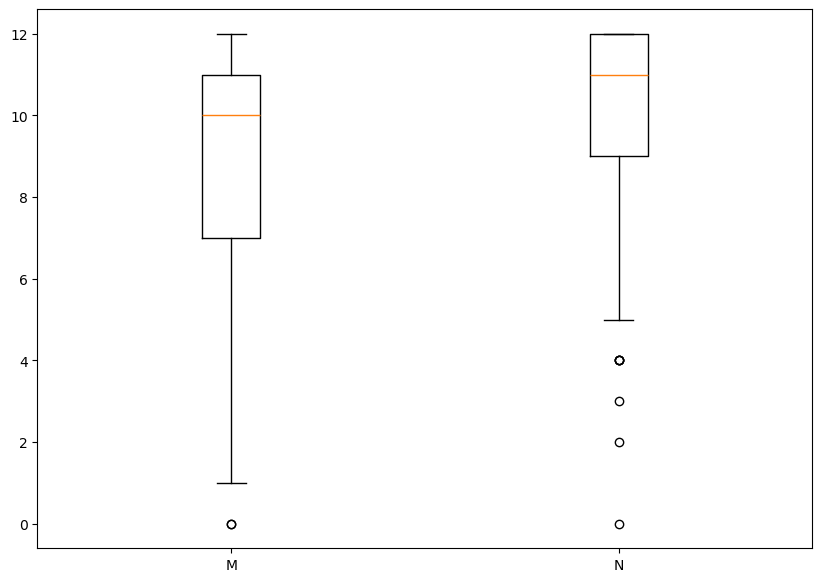

In [6]:
# Keskmise osaletud praktikumide arvutamine

dfcopy = df.copy()

# Esimese praktikumi eest oli võimalik saada 1 punkt, aga teistes 0,5 punkti, seega asendatake esimese praktikumi punktisumma samuti 0,5-ga
# Esimese praktikumi eest said kõik osalejad täpselt ühe punkti
dfcopy["Ülesanne:1. praktikum (Punktid)"] = dfcopy["Ülesanne:1. praktikum (Punktid)"].replace(1, 0.5)

# Eeldatakse, et kui üliõpilane saab praktikumis osalemise eest rohkem kui 0 punkti, siis järelikult ta osales
praktikum_cols = dfcopy.filter(like='praktikum ').columns
for col in praktikum_cols:
    dfcopy[col] = dfcopy[col].map(lambda x: 0.5 if x != 0 and x != '-' else x)

#Punktide summeerimine ühte tulpa, korrutatakse kahega, et saada iga praktikumi eest 1 punkt
dfcopy["Praktikumid kokku"] = dfcopy.filter(like='praktikum ').apply(pd.to_numeric, errors='coerce').sum(axis=1) *2
tulp = 'Praktikumid kokku'
dfcopy = dfcopy[['Sugu', tulp]].copy()

print("Keskmine praktikumides osalemine")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

Järgnevas koodiplokis vaadatakse erinevusi selle vahel, kui suur protsent naissoost ja meessoost üliõpilastest osales kindlas arvus praktikumides (nt ainult ühes, kahes, kolmes, jne praktikumis). 

Iga praktikumi osalemiste puhul hii-ruut testi läbiviimine, et leida, kui kindlas arvus praktikumis osalemistel on statistiliselt oluline erinevus

0 praktikumis osalemise puhul:
Mehi osales 2 ehk 1.0 %
Naisi osales 1 ehk 1.06 %

2 praktikumis osalemise puhul:
Mehi osales 5 ehk 2.5 %
Naisi osales 1 ehk 1.06 %

3 praktikumis osalemise puhul:
Mehi osales 4 ehk 2.0 %
Naisi osales 1 ehk 1.06 %

4 praktikumis osalemise puhul:
Mehi osales 8 ehk 4.0 %
Naisi osales 4 ehk 4.26 %

5 praktikumis osalemise puhul:
Mehi osales 8 ehk 4.0 %
Naisi osales 2 ehk 2.13 %

6 praktikumis osalemise puhul:
Mehi osales 10 ehk 5.0 %
Naisi osales 6 ehk 6.38 %

7 praktikumis osalemise puhul:
Mehi osales 9 ehk 4.5 %
Naisi osales 2 ehk 2.13 %

8 praktikumis osalemise puhul:
Mehi osales 12 ehk 6.0 %
Naisi osales 4 ehk 4.26 %

9 praktikumis osalemise puhul:
Mehi osales 24 ehk 12.0 %
Naisi osales 13 ehk 13.83 %

10 praktikumis osalemise puhul:
Mehi osales 33 ehk 16.5 %
Naisi osales 11 ehk 11.7 %

11 praktikumis osalemi

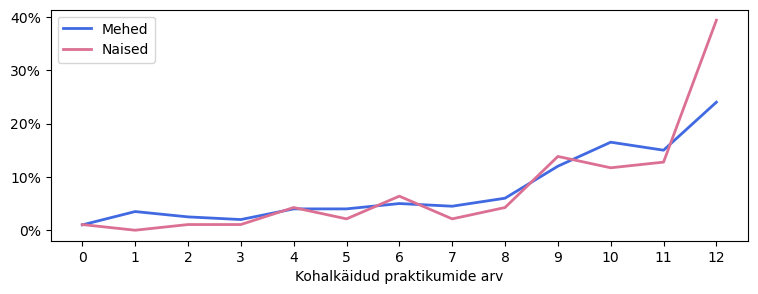

In [7]:
# Praktikumides osalemine protsentuaalselt

dfcopy = df.copy()

# Sarnaselt eelmisele koodiplokile, tehakse kõik praktikumid võrdse kaaluga ja eeldatakse, et iga praktikum, 
# mille eest üliõpilane sai rohkem kui 0 punkti, on osaletud praktikum
dfcopy["Ülesanne:1. praktikum (Punktid)"] = dfcopy["Ülesanne:1. praktikum (Punktid)"].replace(1, 0.5)

praktikum_cols = dfcopy.filter(like='praktikum ').columns
for col in praktikum_cols:
    dfcopy[col] = dfcopy[col].apply(lambda x: 0.5 if x != 0 and x != '-' else 0)

# Praktikumide arvu liitmine, kahega korrutamine, et saada osaluskordade arv
dfcopy["Praktikumid kokku"] = dfcopy.filter(like='praktikum ').apply(pd.to_numeric, errors='coerce').sum(axis=1) *2

tulp = 'Praktikumid kokku'
dfcopy = dfcopy[['Sugu', tulp]].copy()

dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Soo põhjal esinemissageduse leidmine
osalemised = dfcopy.groupby([tulp, "Sugu"]).size().unstack(fill_value=0)
kokku = dfcopy["Sugu"].value_counts()
osalemisprotsent = osalemised.div(kokku, axis=1) * 100

print("Iga praktikumi osalemiste puhul hii-ruut testi läbiviimine, et leida, kui kindlas arvus praktikumis osalemistel on statistiliselt oluline erinevus")
print("")

sagedustabel = pd.crosstab(dfcopy[tulp], dfcopy["Sugu"])

for arv in sagedustabel.index:
    meestearv = sagedustabel["M"].get(arv, 0)
    naistearv = sagedustabel["N"].get(arv, 0)

    # Et vältida 0 väärtusega testimist
    if(meestearv==0 or naistearv==0):
        continue

    # Hii-ruut test
    stat, p, dof, expected = chi2_contingency([[meestearv, kokku["M"] - meestearv],
                                               [naistearv, kokku["N"] - naistearv]])
    print(f"{arv:.0f} praktikumis osalemise puhul:")
    print(f"Mehi osales {meestearv} ehk {round(meestearv / kokku['M'] * 100, 2)} %")
    print(f"Naisi osales {naistearv} ehk {round(naistearv / kokku['N']*100, 2)} %")
    
    if p <= 0.05:
        
        print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f} -> OLULINE ERINEVUS")

    print("")

# Visualiseerimine joondiagrammina
fig = plt.figure(figsize =(9, 3))
plt.plot(osalemisprotsent.index, osalemisprotsent["M"],  color = "royalblue", linestyle="solid", label="Mehed", lw=2)
plt.plot(osalemisprotsent.index, osalemisprotsent["N"],  color = "palevioletred", linestyle="solid",  label="Naised", lw=2)
plt.legend()
plt.xticks(range(13))
plt.xlabel ('Kohalkäidud praktikumide arv')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%")) 

# Joonise kuvamine
plt.show()

### Koduülesanded

Koduülesannete lahendamise eest oli kokku võimalik saada 5,5 punki. Kokku oli 11 kodutööd, iga eest 0,5 punkti. 

Koduülesannete lahendamine

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 2.8625254835761005e-14
Ei ole normaaljaotus

Mehed -  mediaan: 4.2, keskmine: 3.77, standardhälve: 1.64
Naised - mediaan: 4.4, keskmine: 3.89, standardhälve: 1.53

Mann-Whitney test - U-stat: 9047.0 p-value: 0.604


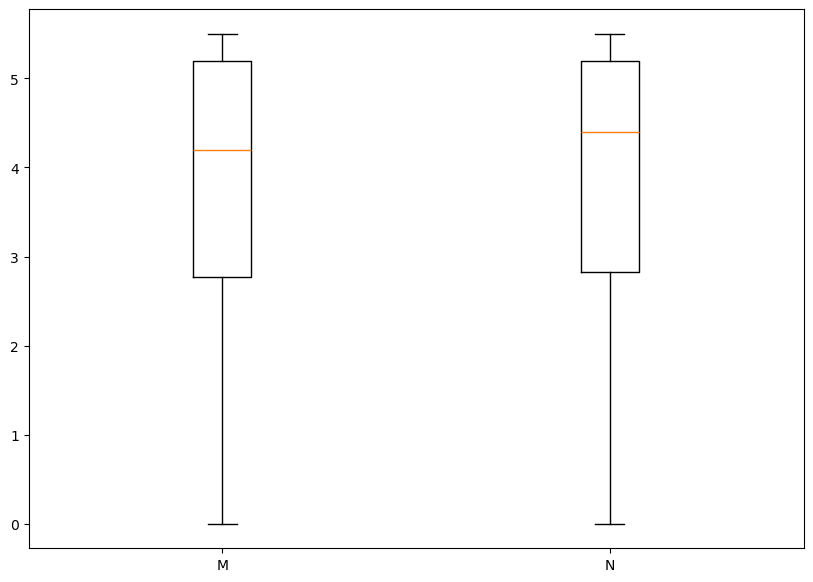

In [8]:
# Kodutööd

dfcopy = df.copy()
dfcopy["Kodutööd kokku"] = dfcopy.filter(like='koduülesanded ').apply(pd.to_numeric, errors='coerce').sum(axis=1)
tulp = 'Kodutööd kokku'
dfcopy = dfcopy[['Sugu', tulp]].copy()

print("Koduülesannete lahendamine")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Esimene kontrolltöö

Esimene kontrolltöö võtmata arvesse lisapunkti, mille jaoks üliõpilased soovi korral kontrolltöö analüüsi esitada said. Maksimaalselt oli võimalik kontrolltöös saada 16 punkti.

Esimene kontrolltöö ilma kontrolltöö analüüsi lisapunktita

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 1.5795489425552281e-19
Ei ole normaaljaotus

Kontrolltöö teinud meeste arv 185 ja protsent 92.5
Kontrolltöö teinud naiste arv 91 ja protsent 96.81
Hii-ruut: 1.38, p-value: 0.239

Mehed -  mediaan: 15.3, keskmine: 14.81, standardhälve: 1.55
Naised - mediaan: 14.95, keskmine: 14.36, standardhälve: 1.55

Mann-Whitney test - U-stat: 10401.5 p-value: 0.001
      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05


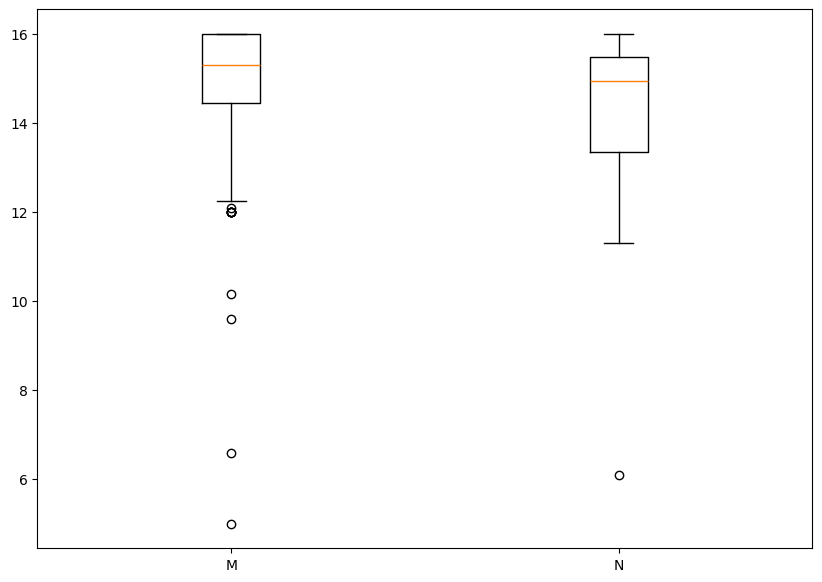

In [9]:
# Kontrolltöö 1 kokku
tulp = 'Kontrolltöö 1 kokku (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

# Algne meeste ja naiste arv andmestikus
kokkumehi = (dfcopy["Sugu"] == "M").sum()
kokkunaisi = (dfcopy["Sugu"] == "N").sum()

print("Esimene kontrolltöö ilma kontrolltöö analüüsi lisapunktita")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Kontrolltöö või kontrolltöö järeltöö sooritanute arv
meestearv = (dfcopy["Sugu"] == "M").sum()
naistearv = (dfcopy["Sugu"] == "N").sum()

print("Kontrolltöö teinud meeste arv", meestearv, "ja protsent", round(meestearv/kokkumehi*100, 2))
print("Kontrolltöö teinud naiste arv", naistearv, "ja protsent", round(naistearv/kokkunaisi*100, 2))

# Hii-ruut test, et vaadata, kas osalenute arvus oli statistiliselt oluline sooline erinevus
stat, p, dof, expected = chi2_contingency([[meestearv, naistearv],
                                           [kokkumehi - meestearv, kokkunaisi - naistearv]])
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Analüüsist saadav lisapunkt

Uuritakse, kas on erinevusi selle puhul, kuidas mehed ja naised erinevate kontrolltööst saadud punktisummadega kontrolltöö analüüsi esitasid 

In [10]:
# Kontrolltöö punktidest kategooriatesse jagamine
def analüüsipunkt(punktiarv):
    if punktiarv == 16:
        return 'max'
    elif punktiarv >=15:
        return 'kuni punkt puudu max'
    elif punktiarv >=12:
        return 'lävend ületatud'
    elif punktiarv >=11: 
        return 'kuni punkt puudu lävendist'
    else:
        return 'ei ületa lävendit'

Järgmises koodiplokis on eraldatud kategooriatesse kontrolltöö algse sooritamise punktid ülemise funktsiooni analüüsipunkt abil. Neile, kes sooritasid ainult kontrolltöö järeltööd, kuid mitte algset kontrolltööd, on antud eraldi kategooria. 

In [11]:
# Eraldatud kontrolltöö ja järeltöö

tulp1 = 'VPL harjutus:Kontrolltöö nr 1 (Transport) (Punktid)'
tulp2 = 'VPL harjutus:Kontrolltöö nr 1 (Ehted) (Punktid)'
tulp = 'Kontrolltöö 1 algne sooritus'

järeltöötulp = 'VPL harjutus:Kontrolltöö nr 1 (järeltöö 29.05) (Punktid)'
järeltöötulp2 = 'VPL harjutus:Korduseksamieelne 1. kontrolltöö järeltöö (17.06) (Punktid)'
järeltöötulp3 = 'VPL harjutus:Kontrolltöö nr 1 järeltöö (Restoran) (Punktid)'

dfcopy = df[['Sugu', tulp1, tulp2, järeltöötulp, järeltöötulp2, järeltöötulp3, 'Kontrolltöö analüüs kokku (Punktid)']].copy()

# Eemaldatud üliõpilased, kes ei teinud ei esimest kontrolltööd ega selle järeltööd
tühjadread = (dfcopy[tulp1] == "-") & (dfcopy[tulp2] == "-") & (dfcopy[järeltöötulp] == "-") & (dfcopy[järeltöötulp2] == "-")& (dfcopy[järeltöötulp3] == "-")

dfcopy = dfcopy[~tühjadread]

dfcopy["Punktide kategooria"] = None

# Eraldatud kategooriasse need, kes sooritasid ainult järeltöö
dfcopy.loc[(dfcopy[tulp1] == "-") & (dfcopy[tulp2] == "-"), "Punktide kategooria"] = "Sooritasid ainult järeltöö"

dfcopy[[tulp1, tulp2]] = dfcopy[[tulp1, tulp2]].replace("-", pd.NA)
# Kombineerime kontrolltöö algse katse tulbad, võttes mitte-tühja väärtuse
dfcopy[tulp] = dfcopy[tulp1].fillna(dfcopy[tulp2])

# Neile, kes ei teinud ainult järeltööd, ehk kes sooritasid ka kontrolltöö algset katset, punktikategooria määramine funktsiooni analüüsipunkt abil
tühjadread = dfcopy["Punktide kategooria"].isna()
dfcopy.loc[tühjadread, "Punktide kategooria"] = dfcopy.loc[tühjadread, tulp].apply(analüüsipunkt)

# Määrab, kas üliõpilane esitas kontrolltöö analüüsi
dfcopy["Esitas kontrolltöö analüüsi"] = dfcopy['Kontrolltöö analüüs kokku (Punktid)'].apply(lambda x: "Jah" if x != "-" else "Ei")


Kontrolltöö analüüsi esitanud meeste ja naiste sagedused ja hii-ruut test, et leida, kas analüüsi üldisel esitamisel on statistiliselt oluline erinevus

In [12]:
# Sageduste kokkuvõte
kokkuvõte = dfcopy.groupby(['Sugu', "Punktide kategooria"])['Esitas kontrolltöö analüüsi'].value_counts(normalize=True).unstack()
print(kokkuvõte)
print ("")

# Hii-ruut test kontrolltöö analüüsi esitanute ja soo vahel
kokku = dfcopy["Sugu"].value_counts()
sagedustabel_kat = pd.crosstab(dfcopy['Esitas kontrolltöö analüüsi'], dfcopy["Sugu"])

print(sagedustabel_kat)

stat, p, dof, expected = chi2_contingency(sagedustabel_kat)
    
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS")    

Esitas kontrolltöö analüüsi            Ei       Jah
Sugu Punktide kategooria                           
M    Sooritasid ainult järeltöö  1.000000       NaN
     ei ületa lävendit           0.666667  0.333333
     kuni punkt puudu lävendist  0.500000  0.500000
     kuni punkt puudu max        0.793103  0.206897
     lävend ületatud             0.815789  0.184211
     max                         1.000000       NaN
N    Sooritasid ainult järeltöö  0.777778  0.222222
     ei ületa lävendit           0.750000  0.250000
     kuni punkt puudu lävendist  0.833333  0.166667
     kuni punkt puudu max        0.750000  0.250000
     lävend ületatud             0.739130  0.260870
     max                         1.000000       NaN

Sugu                           M   N
Esitas kontrolltöö analüüsi         
Ei                           153  71
Jah                           32  20
Hii-ruut: 0.59, p-value: 0.441


Hii-ruut test, et vaadata, kas punktikategooriatesse jaotumises tekib statistiliselt oluline erinevus

In [13]:
# Vastavas punktikategoorias olev meeste ja naiste arv
print("Mehed ja naised vastavas punktikategoorias")
sagedustabel = pd.crosstab(dfcopy["Punktide kategooria"], dfcopy["Sugu"])

print(sagedustabel)

print ("")
print("Meeste ja naiste protsentuaalne jaotus punktikategooriatesse") 
#Prontsentides jaotus
loendur = dfcopy.groupby(["Punktide kategooria", "Sugu"]).size().unstack(fill_value=0)
protsent = loendur.div(kokku, axis=1) * 100

print(protsent)

print("")

# Hii-ruut test, kas leidub statistiliselt oluline erinevus vastavas punktikategoorias meeste ja naiste vahel
stat, p, dof, expected = chi2_contingency(sagedustabel)
    
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS") 
print("")
print("Oodatud väärtused:")
print(expected)


Mehed ja naised vastavas punktikategoorias
Sugu                         M   N
Punktide kategooria               
Sooritasid ainult järeltöö   8   9
ei ületa lävendit           27  12
kuni punkt puudu lävendist   8   6
kuni punkt puudu max        58  32
lävend ületatud             38  23
max                         46   9

Meeste ja naiste protsentuaalne jaotus punktikategooriatesse
Sugu                                M          N
Punktide kategooria                             
Sooritasid ainult järeltöö   4.324324   9.890110
ei ületa lävendit           14.594595  13.186813
kuni punkt puudu lävendist   4.324324   6.593407
kuni punkt puudu max        31.351351  35.164835
lävend ületatud             20.540541  25.274725
max                         24.864865   9.890110

Hii-ruut: 11.53, p-value: 0.042
OLULINE ERINEVUS

Oodatud väärtused:
[[11.39492754  5.60507246]
 [26.14130435 12.85869565]
 [ 9.38405797  4.61594203]
 [60.32608696 29.67391304]
 [40.88768116 20.11231884]
 [36.86594203 18.1

Hii-ruut testi järgi punktikategooriatesse jaotumisel oluline erinevus, järgmises koodiblokis vaadatakse iga kategooria puhul eraldi hii-ruut testi abil, kas on statistiliselt oluline sooline erinevus 

In [14]:
for kategooria in sagedustabel.index:
    meestearv = sagedustabel["M"].get(kategooria, 0)
    naistearv = sagedustabel["N"].get(kategooria, 0)
    if(meestearv==0 or naistearv==0):
        continue
    stat, p, dof, expected = chi2_contingency([[meestearv, kokku["M"] - meestearv],
                                               [naistearv, kokku["N"] - naistearv]])
    print(kategooria)
    print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
    if p <= 0.05:    
        print("OLULINE ERINEVUS") 
    print("")


Sooritasid ainult järeltöö
Hii-ruut: 2.38, p-value: 0.123

ei ületa lävendit
Hii-ruut: 0.02, p-value: 0.895

kuni punkt puudu lävendist
Hii-ruut: 0.27, p-value: 0.606

kuni punkt puudu max
Hii-ruut: 0.25, p-value: 0.618

lävend ületatud
Hii-ruut: 0.54, p-value: 0.461

max
Hii-ruut: 7.66, p-value: 0.006
OLULINE ERINEVUS



Kontrolltöö analüüsi esitamine punktikategooria põhjal ja vastav hii-ruut test, et kontrollida soolist erinevust

In [15]:
for kategooria in ["Sooritasid ainult järeltöö", "ei ületa lävendit", "kuni punkt puudu lävendist", "lävend ületatud", "kuni punkt puudu max"]:
    print(kategooria)
    dfcopy_kat = dfcopy[dfcopy["Punktide kategooria"] ==kategooria]
    sagedustabel_kat = pd.crosstab(dfcopy_kat['Esitas kontrolltöö analüüsi'], dfcopy_kat["Sugu"])

    kokku = dfcopy_kat["Sugu"].value_counts()
    print(sagedustabel_kat)
    print("")
    
    stat, p, dof, expected = chi2_contingency(sagedustabel_kat, correction=True)
    
    print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
    if p <= 0.05:    
        print("OLULINE ERINEVUS") 
    
    print ("--------------------------")
        

Sooritasid ainult järeltöö
Sugu                         M  N
Esitas kontrolltöö analüüsi      
Ei                           8  7
Jah                          0  2

Hii-ruut: 0.44, p-value: 0.506
--------------------------
ei ületa lävendit
Sugu                          M  N
Esitas kontrolltöö analüüsi       
Ei                           18  9
Jah                           9  3

Hii-ruut: 0.02, p-value: 0.885
--------------------------
kuni punkt puudu lävendist
Sugu                         M  N
Esitas kontrolltöö analüüsi      
Ei                           4  5
Jah                          4  1

Hii-ruut: 0.53, p-value: 0.469
--------------------------
lävend ületatud
Sugu                          M   N
Esitas kontrolltöö analüüsi        
Ei                           31  17
Jah                           7   6

Hii-ruut: 0.15, p-value: 0.699
--------------------------
kuni punkt puudu max
Sugu                          M   N
Esitas kontrolltöö analüüsi        
Ei                         

Esimese kontrolltöö analüüsi tulemuste punktijaotus

Kontrolltöö analüüsi tulemus

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 4.157213462363529e-11
Ei ole normaaljaotus

Mehed -  mediaan: 1.0, keskmine: 0.85, standardhälve: 0.26
Naised - mediaan: 1.0, keskmine: 0.92, standardhälve: 0.18

Mann-Whitney test - U-stat: 259.0 p-value: 0.184


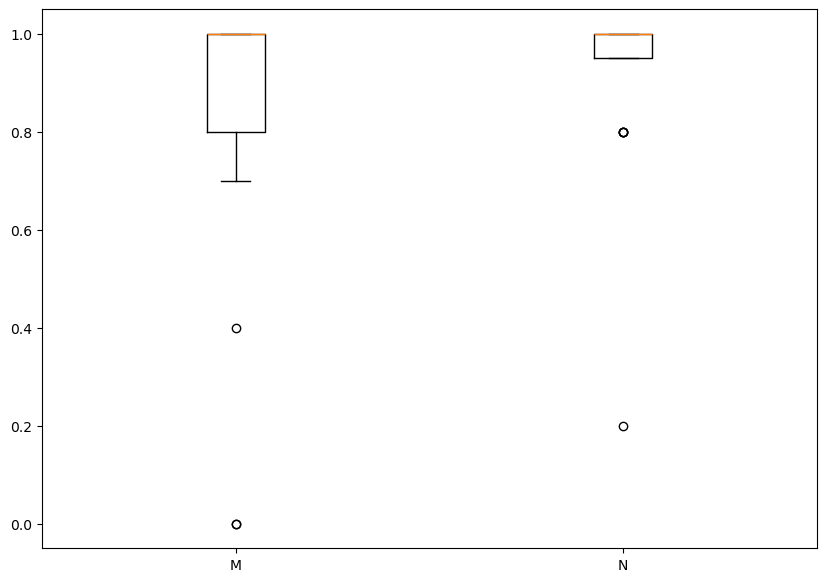

In [16]:
# Kontrolltöö 1 analüüsist saadav lisapunkt

tulp = 'Kontrolltöö analüüs kokku (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

print("Kontrolltöö analüüsi tulemus")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Esimese kontrolltöö lõplikud punktid

Esimese kontrolltöö lõplikud punktid

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 1.1055353705095744e-20
Ei ole normaaljaotus

Mehed -  mediaan: 15.5, keskmine: 14.94, standardhälve: 1.52
Naised - mediaan: 15.0, keskmine: 14.54, standardhälve: 1.57

Mann-Whitney test - U-stat: 10152.5 p-value: 0.005
      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05

Hii-ruut test kontrolltöö lõplike tulemuste maksimumpunktide saanute puhul
Maksimumpunktid saanud meeste arv 60 ja protsent 32.43
Maksimumpunktid saanud naiste arv 17 ja protsent 18.68
Hii-ruut: 5.07, p-value: 0.024
OLULINE ERINEVUS


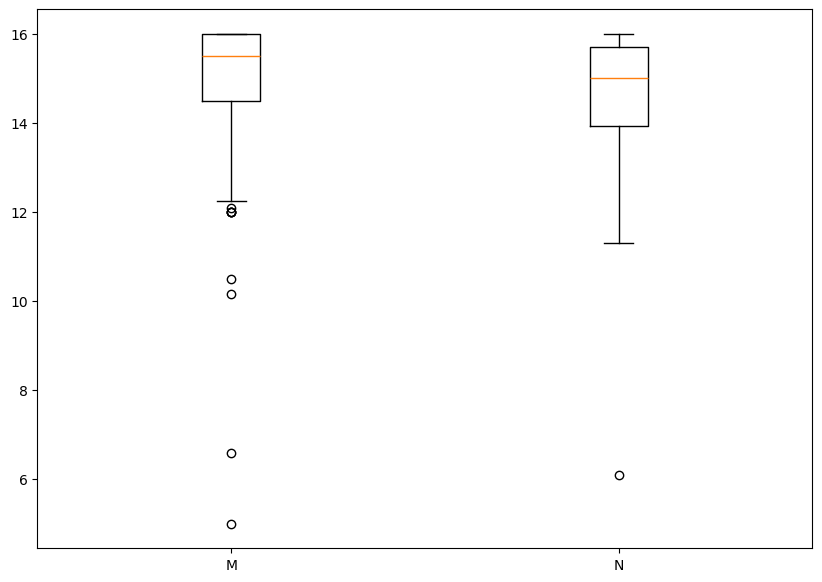

In [17]:
# Kontrolltöö 1 + analüüs kokku 
tulp = 'Kontrolltöö 1 + analüüs kokku (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

print("Esimese kontrolltöö lõplikud punktid")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

print("")
# Kas maksimumpunktide vahel endiselt statistiliselt oluline sooline erinevus ja mil määral?
dfcopy["Punktide kategooria"] = dfcopy[tulp].apply(analüüsipunkt)

kokkumehi = (dfcopy["Sugu"] == "M").sum()
kokkunaisi = (dfcopy["Sugu"] == "N").sum()

meestearv = ((dfcopy["Sugu"] == "M") & (dfcopy["Punktide kategooria"]=="max")).sum()
naistearv = ((dfcopy["Sugu"] == "N")& (dfcopy["Punktide kategooria"]=="max")).sum()

print("Hii-ruut test kontrolltöö lõplike tulemuste maksimumpunktide saanute puhul")
print("Maksimumpunktid saanud meeste arv", meestearv, "ja protsent", round(meestearv/kokkumehi*100, 2))
print("Maksimumpunktid saanud naiste arv", naistearv, "ja protsent", round(naistearv/kokkunaisi*100, 2))

stat, p, dof, expected = chi2_contingency([[meestearv, naistearv],
                                           [kokkumehi - meestearv, kokkunaisi - naistearv]], correction=True)
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
    print("OLULINE ERINEVUS") 

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Teine kontrolltöö

Teine kontrolltöö võtmata arvesse lisapunkti, mille jaoks üliõpilased soovi korral kontrolltöö analüüsi esitada said. Maksimaalselt oli võimalik kontrolltöös saada 16 punkti.

Teine kontrolltöö ilma kontrolltöö analüüsi lisapunktita

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 2.3651676584353758e-18
Ei ole normaaljaotus

Kontrolltöö teinud meeste arv 179 ja protsent 89.5
Kontrolltöö teinud naiste arv 86 ja protsent 91.49
Hii-ruut: 0.10, p-value: 0.746

Mehed -  mediaan: 14.5, keskmine: 13.22, standardhälve: 3.53
Naised - mediaan: 13.75, keskmine: 12.21, standardhälve: 4.48

Mann-Whitney test - U-stat: 8205.5 p-value: 0.379


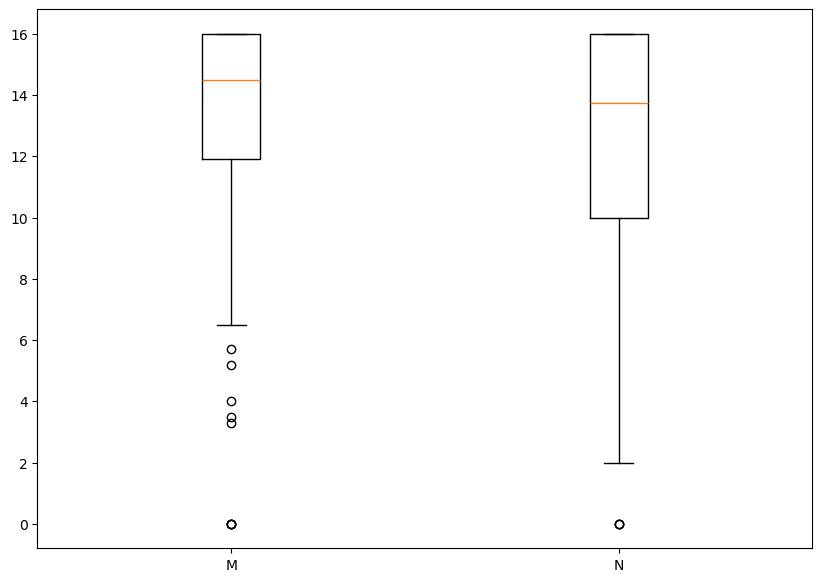

In [18]:
# Kontrolltöö 2
tulp = 'Kontrolltöö 2 kokku (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

# Algne meeste ja naiste arv andmestikus
kokkumehi = (dfcopy["Sugu"] == "M").sum()
kokkunaisi = (dfcopy["Sugu"] == "N").sum()

print("Teine kontrolltöö ilma kontrolltöö analüüsi lisapunktita")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Kontrolltöö või kontrolltöö järeltöö sooritanute arv
meestearv = (dfcopy["Sugu"] == "M").sum()
naistearv = (dfcopy["Sugu"] == "N").sum()

print("Kontrolltöö teinud meeste arv", meestearv, "ja protsent", round(meestearv/kokkumehi*100, 2))
print("Kontrolltöö teinud naiste arv", naistearv, "ja protsent", round(naistearv/kokkunaisi*100, 2))

# Hii-ruut test, et vaadata, kas osalenute arvus oli statistiliselt oluline sooline erinevus
stat, p, dof, expected = chi2_contingency([[meestearv, naistearv],
                                           [kokkumehi - meestearv, kokkunaisi - naistearv]])
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Analüüsist saadav lisapunkt

Sarnaselt esimesele kontrolltööle, uuritakse, kas on erinevusi selle puhul, kuidas mehed ja naised erinevate kontrolltööst saadud punktisummadega kontrolltöö analüüsi esitasid. Teise kontrolltöö puhul aga lävendit ei olnud, seega kategooriaid on vähem.

In [19]:
def analüüsipunkt2(punktiarv):
    if punktiarv == 16:
        return 'max'
    elif punktiarv >=15:
        return 'kuni punkt puudu max'
    else:
        return 'ülejäänud'

Järgmises koodiplokis on eraldatud kategooriatesse kontrolltöö algse sooritamise punktid ülemise funktsiooni analüüsipunkt abil. Neile, kes sooritasid ainult kontrolltöö järeltööd, kuid mitte algset kontrolltööd, on antud eraldi kategooria. 

In [20]:
#Eraldatud kontrolltöö ja järeltöö
tulp1 = 'VPL harjutus:Kontrolltöö nr 2 (Autorent) (Punktid)'
tulp2 = 'VPL harjutus:Kontrolltöö nr 2 (Turniir) (Punktid)'
tulp ="Kontrolltöö 2 algne sooritus"

järeltöötulp = 'VPL harjutus:Kontrolltöö nr 2 (järeltöö 30.05) (Punktid)'
järeltöötulp2 = 'VPL harjutus:Korduseksamieelne 2. kontrolltöö järeltöö (18.06) (Punktid)'

dfcopy = df[['Sugu', tulp1, tulp2, järeltöötulp, järeltöötulp2, 'Kontrolltöö nr. 2 analüüs kokku (Punktid)']].copy()

# Eemaldatud üliõpilased, kes ei teinud ei teist kontrolltööd ega selle järeltööd
tühjadread = (dfcopy[tulp1] == "-") & (dfcopy[tulp2] == "-") & (dfcopy[järeltöötulp] == "-") & (dfcopy[järeltöötulp2] == "-")

dfcopy = dfcopy[~tühjadread]

dfcopy["Punktide kategooria"] = None

# Eraldatud kategooriasse need, kes sooritasid ainult järeltöö
dfcopy.loc[(dfcopy[tulp1] == "-") & (dfcopy[tulp2] == "-"), "Punktide kategooria"] = "Sooritasid ainult järeltöö"

dfcopy[[tulp1, tulp2]] = dfcopy[[tulp1, tulp2]].replace("-", pd.NA)
# Kombineerime kontrolltöö algse katse tulbad, võttes mitte-tühja väärtuse
dfcopy[tulp] = dfcopy[tulp1].fillna(dfcopy[tulp2])

# Neile, kes ei teinud ainult järeltööd, ehk kes sooritasid ka kontrolltöö algset katset, punktikategooria määramine funktsiooni analüüsipunkt abil
tühjadread = dfcopy["Punktide kategooria"].isna()
dfcopy.loc[tühjadread, "Punktide kategooria"] = dfcopy.loc[tühjadread, tulp].apply(analüüsipunkt2)

# Määrab, kas üliõpilane esitas kontrolltöö analüüsi
dfcopy["Esitas kontrolltöö analüüsi"] = dfcopy['Kontrolltöö nr. 2 analüüs kokku (Punktid)'].apply(lambda x: "Jah" if x != "-" else "Ei")


Teise kontrolltöö analüüsi esitanud meeste ja naiste sagedused ja hii-ruut test, et leida, kas analüüsi üldisel esitamisel on statistiliselt oluline erinevus

In [21]:
# Sageduste kokkuvõte
kokkuvõte = dfcopy.groupby(['Sugu', "Punktide kategooria"])['Esitas kontrolltöö analüüsi'].value_counts(normalize=True).unstack()
print(kokkuvõte)
print ("")

# Hii-ruut test kontrolltöö analüüsi esitanute ja soo vahel
kokku = dfcopy["Sugu"].value_counts()
sagedustabel_kat = pd.crosstab(dfcopy['Esitas kontrolltöö analüüsi'], dfcopy["Sugu"])

print(sagedustabel_kat)

stat, p, dof, expected = chi2_contingency(sagedustabel_kat)
    
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS")    

Esitas kontrolltöö analüüsi            Ei       Jah
Sugu Punktide kategooria                           
M    Sooritasid ainult järeltöö  0.875000  0.125000
     kuni punkt puudu max        0.900000  0.100000
     max                         1.000000       NaN
     ülejäänud                   0.898734  0.101266
N    Sooritasid ainult järeltöö  0.857143  0.142857
     kuni punkt puudu max        0.900000  0.100000
     max                         1.000000       NaN
     ülejäänud                   0.913043  0.086957

Sugu                           M   N
Esitas kontrolltöö analüüsi         
Ei                           164  80
Jah                           15   6
Hii-ruut: 0.02, p-value: 0.878


Hii-ruut test, et vaadata, kas punktikategooriatesse jaotumises tekib statistiliselt oluline erinevus

In [22]:
# Vastavas punktikategoorias olev meeste ja naiste arv
print("Mehed ja naised vastavas punktikategoorias")
sagedustabel = pd.crosstab(dfcopy["Punktide kategooria"], dfcopy["Sugu"])

print(sagedustabel)

print ("")
print("Meeste ja naiste protsentuaalne jaotus punktikategooriatesse") 
#Prontsentides jaotus
loendur = dfcopy.groupby(["Punktide kategooria", "Sugu"]).size().unstack(fill_value=0)
protsent = loendur.div(kokku, axis=1) * 100

print(protsent)

print("")

# Hii-ruut test, kas leidub statistiliselt oluline erinevus vastavas punktikategoorias meeste ja naiste vahel
stat, p, dof, expected = chi2_contingency(sagedustabel)
    
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS") 
print("")
print("Oodatud väärtused:")
print(expected)


Mehed ja naised vastavas punktikategoorias
Sugu                         M   N
Punktide kategooria               
Sooritasid ainult järeltöö  32   7
kuni punkt puudu max        30  10
max                         38  23
ülejäänud                   79  46

Meeste ja naiste protsentuaalne jaotus punktikategooriatesse
Sugu                                M          N
Punktide kategooria                             
Sooritasid ainult järeltöö  17.877095   8.139535
kuni punkt puudu max        16.759777  11.627907
max                         21.229050  26.744186
ülejäänud                   44.134078  53.488372

Hii-ruut: 6.60, p-value: 0.086

Oodatud väärtused:
[[26.34339623 12.65660377]
 [27.01886792 12.98113208]
 [41.20377358 19.79622642]
 [84.43396226 40.56603774]]


Järgmises koodiblokis vaadatakse iga kategooria puhul eraldi hii-ruut testi abil, kas on teise kontrolltöö punktikategooriate puhul statistiliselt oluline sooline erinevus, nagu esimeses kontrolltöös leidus maksimumpunktid saanute vahel

In [23]:
for kategooria in sagedustabel.index:
    meestearv = sagedustabel["M"].get(kategooria, 0)
    naistearv = sagedustabel["N"].get(kategooria, 0)
    if(meestearv==0 or naistearv==0):
        continue
    stat, p, dof, expected = chi2_contingency([[meestearv, kokku["M"] - meestearv],
                                               [naistearv, kokku["N"] - naistearv]])
    print(kategooria)
    print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
    if p <= 0.05:    
        print("OLULINE ERINEVUS") 
    print("")


Sooritasid ainult järeltöö
Hii-ruut: 3.65, p-value: 0.056

kuni punkt puudu max
Hii-ruut: 0.83, p-value: 0.363

max
Hii-ruut: 0.71, p-value: 0.399

ülejäänud
Hii-ruut: 1.68, p-value: 0.195



Kontrolltöö analüüsi esitamine punktikategooria põhjal ja vastav hii-ruut test, et kontrollida soolist erinevust

In [24]:
for kategooria in ["Sooritasid ainult järeltöö", "ülejäänud", "kuni punkt puudu max"]:
    print(kategooria)
    dfcopy_kat = dfcopy[dfcopy["Punktide kategooria"] ==kategooria]
    sagedustabel_kat = pd.crosstab(dfcopy_kat['Esitas kontrolltöö analüüsi'], dfcopy_kat["Sugu"])

    kokku = dfcopy_kat["Sugu"].value_counts()
    print(sagedustabel_kat)
    print("")
    
    stat, p, dof, expected = chi2_contingency(sagedustabel_kat, correction=True)
    
    print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
    if p <= 0.05:    
        print("OLULINE ERINEVUS") 
    
    print ("--------------------------")

Sooritasid ainult järeltöö
Sugu                          M  N
Esitas kontrolltöö analüüsi       
Ei                           28  6
Jah                           4  1

Hii-ruut: 0.00, p-value: 1.000
--------------------------
ülejäänud
Sugu                          M   N
Esitas kontrolltöö analüüsi        
Ei                           71  42
Jah                           8   4

Hii-ruut: 0.00, p-value: 1.000
--------------------------
kuni punkt puudu max
Sugu                          M  N
Esitas kontrolltöö analüüsi       
Ei                           27  9
Jah                           3  1

Hii-ruut: 0.00, p-value: 1.000
--------------------------


Teise kontrolltöö analüüsi tulemuste punktijaotus

Kontrolltöö analüüsi tulemus

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 1.1576448599726064e-07
Ei ole normaaljaotus

Mehed -  mediaan: 1.0, keskmine: 0.92, standardhälve: 0.19
Naised - mediaan: 1.0, keskmine: 0.92, standardhälve: 0.19

Mann-Whitney test - U-stat: 43.5 p-value: 0.91


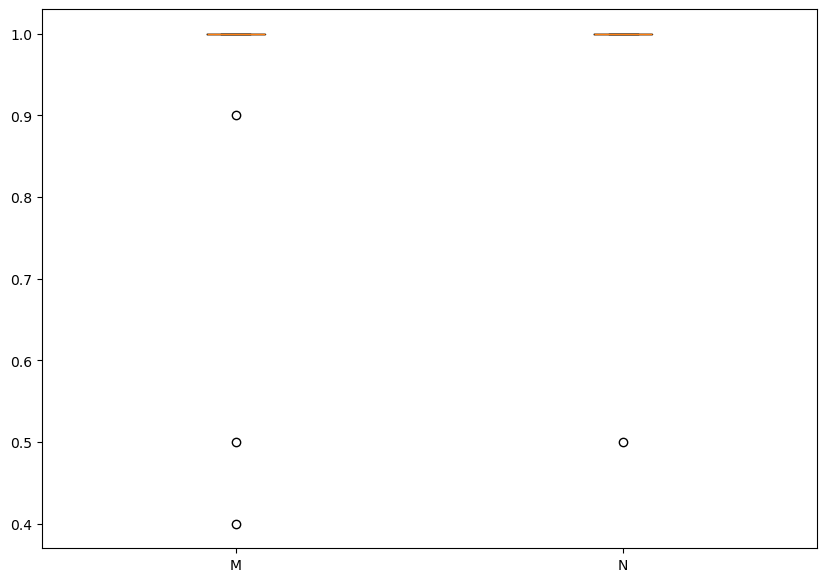

In [25]:
# Kontrolltöö 2 analüüsist saadav lisapunkt

tulp = 'Kontrolltöö nr. 2 analüüs kokku (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

print("Kontrolltöö analüüsi tulemus")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Teise kontrolltöö lõplikud punktid

Teise kontrolltöö lõplikud punktid

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 1.4952766089289382e-18
Ei ole normaaljaotus

Mehed -  mediaan: 14.7, keskmine: 13.29, standardhälve: 3.52
Naised - mediaan: 14.28, keskmine: 12.27, standardhälve: 4.47

Mann-Whitney test - U-stat: 8258.5 p-value: 0.33



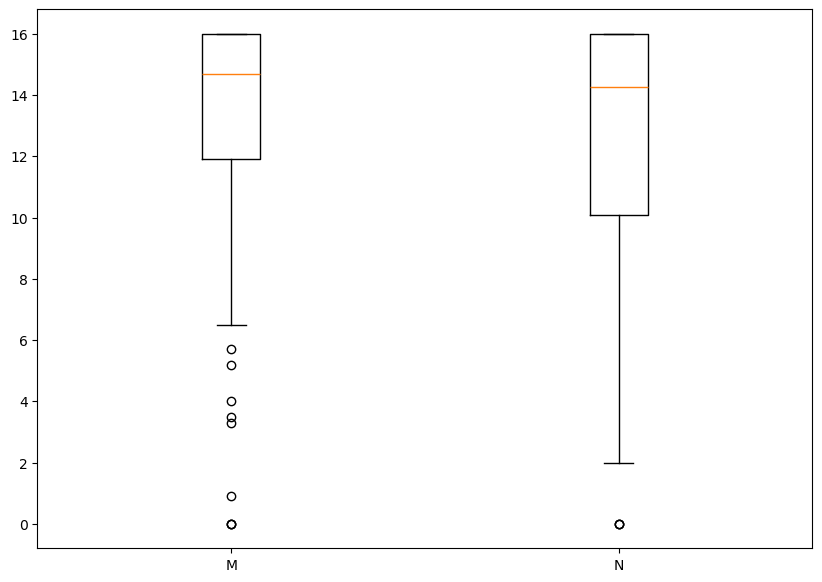

In [26]:
# Kontrolltöö 2 + analüüs kokku 
tulp = 'Kontrolltöö 2 + analüüs kokku (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

print("Teise kontrolltöö lõplikud punktid")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

print("")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Rühmatöö

Rühmatöö

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 1.0623407299752334e-21
Ei ole normaaljaotus

Mehed -  mediaan: 12.5, keskmine: 10.61, standardhälve: 3.43
Naised - mediaan: 12.83, keskmine: 10.94, standardhälve: 3.23

Mann-Whitney test - U-stat: 7666.0 p-value: 0.13


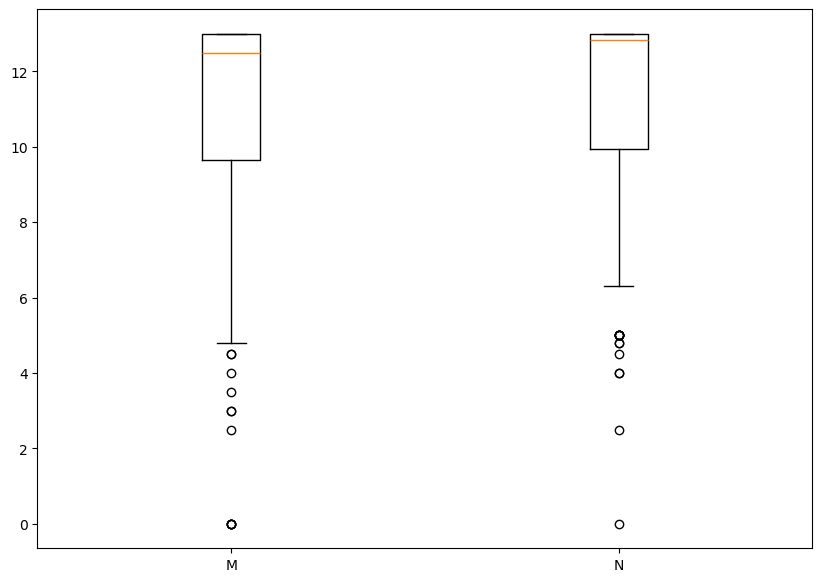

In [27]:
# Rühmatöö kokku
tulp = 'Rühmatöö kokku (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

print("Rühmatöö")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Rühmatöö esimene osa

Rühmatöö esimene osa

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 8.45084385494514e-28
Ei ole normaaljaotus

Rühmatöö esimese osa esitanud meeste arv 184 ja protsent 92.0
Rühmatöö esimese osa esitanud naiste arv 90 ja protsent 95.74
Hii-ruut: 0.89, p-value: 0.347

Mehed -  mediaan: 5.0, keskmine: 4.65, standardhälve: 0.8
Naised - mediaan: 5.0, keskmine: 4.71, standardhälve: 0.8

Mann-Whitney test - U-stat: 7858.0 p-value: 0.405


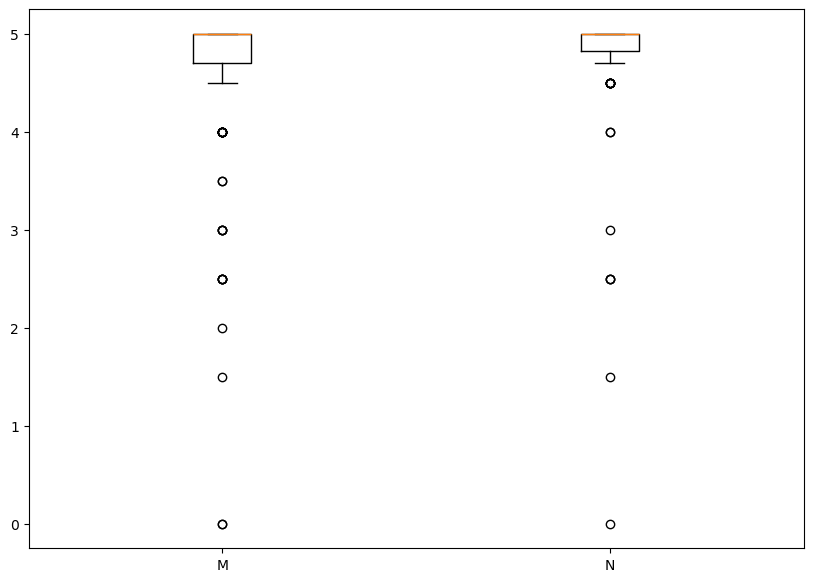

In [28]:
# Rühmatöö nr 1
tulp = 'Ülesanne:Rühmatöö nr. 1 (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

# Algne meeste ja naiste arv andmestikus
kokkumehi = (dfcopy["Sugu"] == "M").sum()
kokkunaisi = (dfcopy["Sugu"] == "N").sum()

print("Rühmatöö esimene osa")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

#Rühmatöö esitanud meeste ja naiste arv
meestearv = (dfcopy["Sugu"] == "M").sum()
naistearv = (dfcopy["Sugu"] == "N").sum()

print("Rühmatöö esimese osa esitanud meeste arv", meestearv, "ja protsent", round(meestearv/kokkumehi*100, 2))
print("Rühmatöö esimese osa esitanud naiste arv", naistearv, "ja protsent", round(naistearv/kokkunaisi*100, 2))

stat, p, dof, expected = chi2_contingency([[meestearv, naistearv],
                                           [kokkumehi - meestearv, kokkunaisi - naistearv]])
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS")
print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)


# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Rühmatöö teine osa

Rühmatöö teine osa

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 1.0848542125901288e-25
Ei ole normaaljaotus

Rühmatöö teise osa esitanud meeste arv 161 ja protsent 80.5
Rühmatöö teise osa esitanud naiste arv 81 ja protsent 86.17
Hii-ruut: 1.05, p-value: 0.306

Mehed -  mediaan: 5.0, keskmine: 4.54, standardhälve: 1.0
Naised - mediaan: 5.0, keskmine: 4.63, standardhälve: 0.95

Mann-Whitney test - U-stat: 5959.5 p-value: 0.195


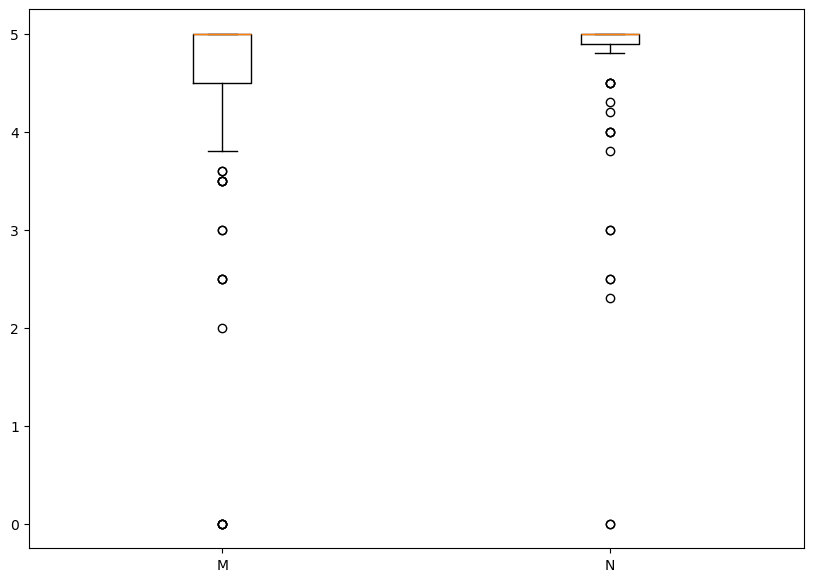

In [29]:
# Rühmatöö nr 2
tulp = 'Ülesanne:Rühmatöö nr. 2 (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()


# Algne meeste ja naiste arv andmestikus
kokkumehi = (dfcopy["Sugu"] == "M").sum()
kokkunaisi = (dfcopy["Sugu"] == "N").sum()

print("Rühmatöö teine osa")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

#Rühmatöö esitanud meeste ja naiste arv
meestearv = (dfcopy["Sugu"] == "M").sum()
naistearv = (dfcopy["Sugu"] == "N").sum()

print("Rühmatöö teise osa esitanud meeste arv", meestearv, "ja protsent", round(meestearv/kokkumehi*100, 2))
print("Rühmatöö teise osa esitanud naiste arv", naistearv, "ja protsent", round(naistearv/kokkunaisi*100, 2))

stat, p, dof, expected = chi2_contingency([[meestearv, naistearv],
                                           [kokkumehi - meestearv, kokkunaisi - naistearv]])
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS")
print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)


# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Rühmatöö esitlus

Rühmatöö esitlus

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 6.386751548207452e-28
Ei ole normaaljaotus

Rühmatöö esitluse esitanud meeste arv 140 ja protsent 70.0
Rühmatöö esitluse esitanud naiste arv 72 ja protsent 76.6
Hii-ruut: 1.07, p-value: 0.300

Mehed -  mediaan: 3.0, keskmine: 2.83, standardhälve: 0.56
Naised - mediaan: 3.0, keskmine: 2.88, standardhälve: 0.5

Mann-Whitney test - U-stat: 4648.5 p-value: 0.23


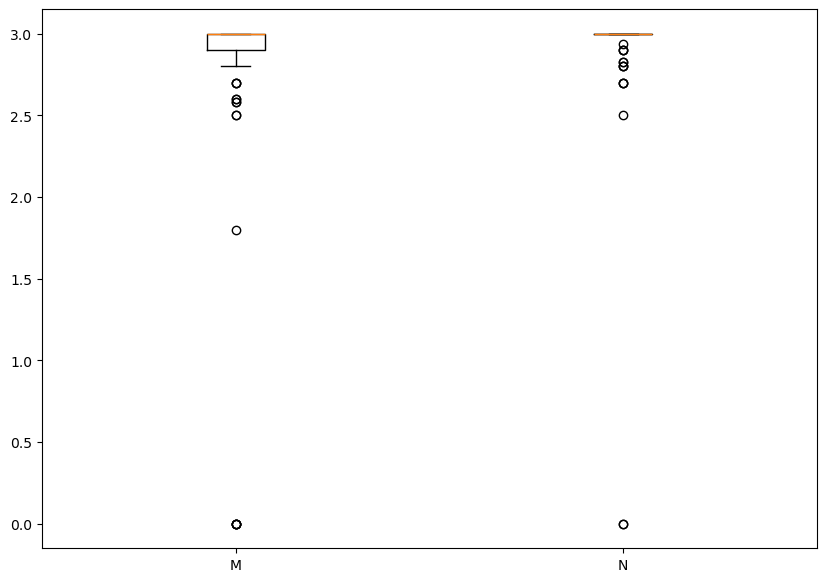

In [30]:
# Rühmatöö esitlus
tulp = 'Ülesanne:Rühmatöö esitlus (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

# Algne meeste ja naiste arv andmestikus
kokkumehi = (dfcopy["Sugu"] == "M").sum()
kokkunaisi = (dfcopy["Sugu"] == "N").sum()

print("Rühmatöö esitlus")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

#Rühmatöö esitanud meeste ja naiste arv
meestearv = (dfcopy["Sugu"] == "M").sum()
naistearv = (dfcopy["Sugu"] == "N").sum()

print("Rühmatöö esitluse esitanud meeste arv", meestearv, "ja protsent", round(meestearv/kokkumehi*100, 2))
print("Rühmatöö esitluse esitanud naiste arv", naistearv, "ja protsent", round(naistearv/kokkunaisi*100, 2))

stat, p, dof, expected = chi2_contingency([[meestearv, naistearv],
                                           [kokkumehi - meestearv, kokkunaisi - naistearv]])
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS")
print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)


# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Loengutestid

Loengutestid

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 4.8040327507466e-25
Ei ole normaaljaotus

Mehed -  mediaan: 11.82, keskmine: 10.72, standardhälve: 2.26
Naised - mediaan: 12.0, keskmine: 11.1, standardhälve: 1.71

Mann-Whitney test - U-stat: 8224.5 p-value: 0.068


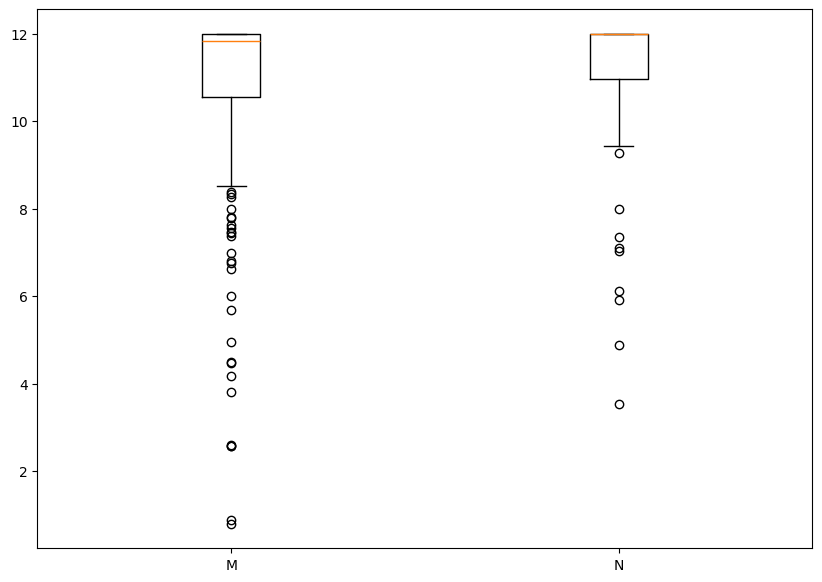

In [31]:
# Loengud (Punktid)
tulp = 'Loengud (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

print("Loengutestid")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Eksam

Eksam

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 5.0312366511207074e-05
Ei ole normaaljaotus

Mehed -  mediaan: 26.4, keskmine: 26.21, standardhälve: 3.67
Naised - mediaan: 25.89, keskmine: 25.52, standardhälve: 3.99

Mann-Whitney test - U-stat: 8421.0 p-value: 0.215


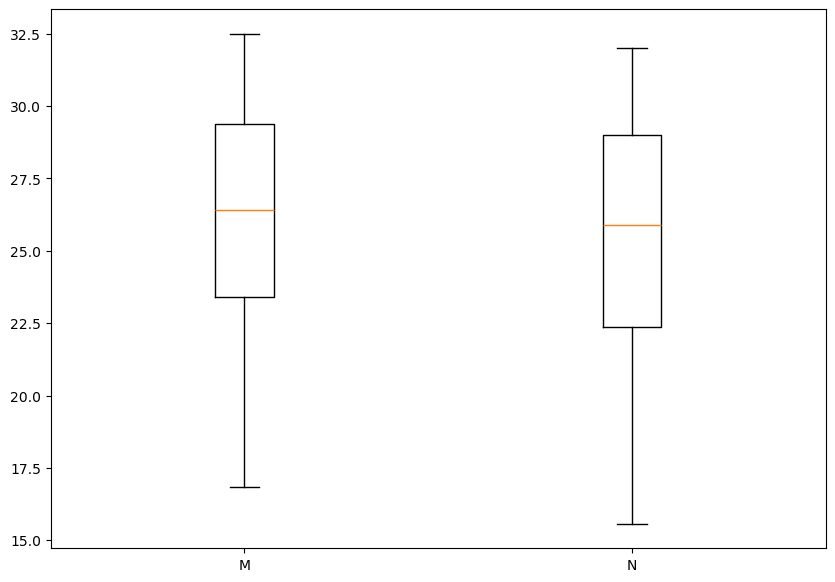

In [32]:
# Eksam (Punktid)
tulp =  'Eksam (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

print("Eksam")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Lisaülesanded

Lisaülesanded

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 0.0005326784448698163
Ei ole normaaljaotus

Lisaülesandeid esitanud meeste arv 25 ja protsent 12.5
Lisaülesandeid esitanud naiste arv 8 ja protsent 8.51
Hii-ruut: 0.66, p-value: 0.416

Mehed -  mediaan: 1.0, keskmine: 1.81, standardhälve: 1.29
Naised - mediaan: 1.0, keskmine: 0.99, standardhälve: 0.36

Mann-Whitney test - U-stat: 134.5 p-value: 0.143


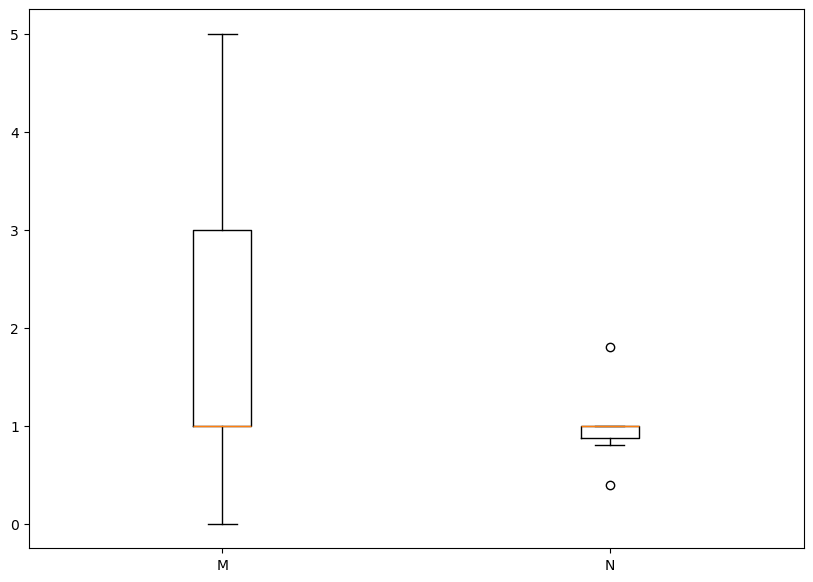

In [33]:
# Lisapunktid kokku 
tulp = 'Lisaülesanded (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

# Algne meeste ja naiste arv andmestikus
kokkumehi = (dfcopy["Sugu"] == "M").sum()
kokkunaisi = (dfcopy["Sugu"] == "N").sum()

print("Lisaülesanded")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

#Rühmatöö esitanud meeste ja naiste arv
meestearv = (dfcopy["Sugu"] == "M").sum()
naistearv = (dfcopy["Sugu"] == "N").sum()

print("Lisaülesandeid esitanud meeste arv", meestearv, "ja protsent", round(meestearv/kokkumehi*100, 2))
print("Lisaülesandeid esitanud naiste arv", naistearv, "ja protsent", round(naistearv/kokkunaisi*100, 2))

stat, p, dof, expected = chi2_contingency([[meestearv, naistearv],
                                           [kokkumehi - meestearv, kokkunaisi - naistearv]])
print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
if p <= 0.05:    
        print("OLULINE ERINEVUS")
print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)


# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Punktide summa kokku 

Punktide summa kokku

Normaaljaotuse kontroll
Shapiro-Wilk test p-value: 1.1756071003569058e-20
Ei ole normaaljaotus

Mehed -  mediaan: 86.59, keskmine: 79.57, standardhälve: 23.65
Naised - mediaan: 85.36, keskmine: 80.65, standardhälve: 20.37

Mann-Whitney test - U-stat: 9348.5 p-value: 0.94


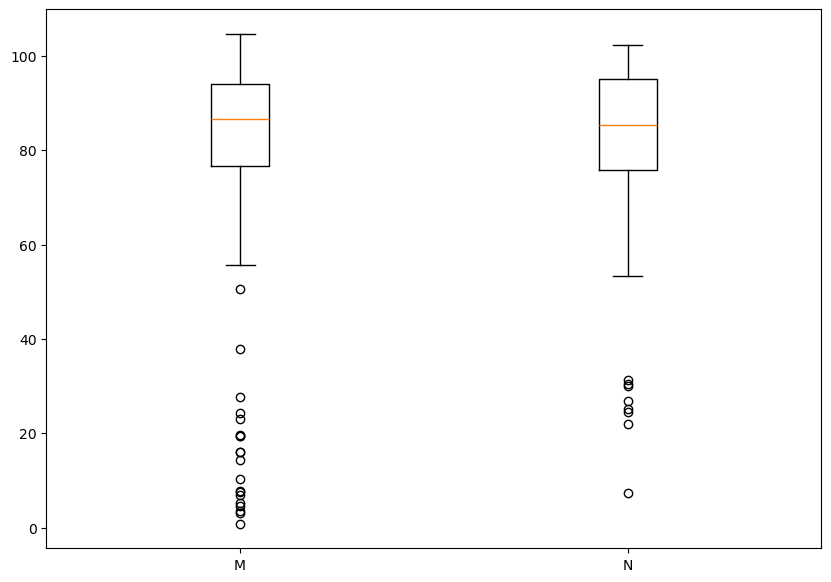

In [34]:
# Punktide summa (Punktid)
tulp = 'Punktide summa (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

print("Punktide summa kokku")
print("")

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Kontroll, kas andmed on normaaljaotusega (Shapiro-Wilk test)
print("Normaaljaotuse kontroll")
statistic, pvalue = shapiro(dfcopy[tulp])

print("Shapiro-Wilk test p-value:", pvalue)
if(pvalue < 0.05):
    print("Ei ole normaaljaotus")
else:
    print("On normaaljaotus")

print("")

# Punktide sooline eraldamine
punktid_M = dfcopy[dfcopy["Sugu"] == "M"][tulp].astype(float)
punktid_N = dfcopy[dfcopy["Sugu"] == "N"][tulp].astype(float)

# Mediaani, keskmise, standardhälve arvutamine
print(f"Mehed -  mediaan: {round(np.median(punktid_M), 2)}, keskmine: {round(np.mean(punktid_M), 2)}, standardhälve: {round(np.std(punktid_M), 2)}")
print(f"Naised - mediaan: {round(np.median(punktid_N), 2)}, keskmine: {round(np.mean(punktid_N), 2)}, standardhälve: {round(np.std(punktid_N), 2)}")

print("")

# Soolise erinevuse test - Mann-Whitney U test
stat, pvalue = mannwhitneyu(punktid_M, punktid_N)
print("Mann-Whitney test - U-stat:", round(stat, 1), "p-value:", round(pvalue, 3))
if (pvalue < 0.05):
    print("      Mann-Whitney U-testi järgi statistiliselt oluline erinevus, olulisusnivoo 0.05")

# Tulemuste visualiseerimine karpdiagrammina
fig = plt.figure(figsize =(10, 7))
plt.boxplot([punktid_M, punktid_N], labels=["M", "N"])

# Joonise kuvamine
plt.show()

### Hinnete võrdlus

In [35]:
def hinne(punktiarv):
    if punktiarv > 90:
        return 'A'
    elif punktiarv > 80:
        return 'B'
    elif punktiarv > 70:
        return 'C'
    elif punktiarv > 60: 
        return 'D'
    elif punktiarv >= 51:
        return 'E'
    else:
        return 'F'

In [36]:
tulp = 'Punktide summa (Punktid)'
dfcopy = df[['Sugu', tulp]].copy()

# Tekstiväärtuste teisendamine numbriteks, puuduvate väärtuste eemaldamine
dfcopy[tulp] = pd.to_numeric(dfcopy[tulp], errors='coerce')
dfcopy.dropna(subset = [tulp], inplace=True)

# Ülemises koodiplokis oleva funktsiooni "hinne" abil punktidest hinde määramine"
dfcopy["Hinne"] = dfcopy[tulp].apply(hinne)

tulp = "Hinne"
#Mitu meest ja naist igas hinde kategoorias on
hinde_arvud = dfcopy.groupby([tulp, "Sugu"]).size().unstack(fill_value=0)

kokku = dfcopy["Sugu"].value_counts()
hindeprotsent = hinde_arvud.div(kokku, axis=1) * 100

sagedustabel = pd.crosstab(dfcopy[tulp], dfcopy["Sugu"])

print("Hinde saanud meeste ja naiste arvud")
print(sagedustabel)
print("")
print("Hinde saanud meeste ja naiste protsendid")
print(hindeprotsent)

for hinne in sagedustabel.index:
    meestearv = sagedustabel["M"].get(hinne, 0)
    naistearv = sagedustabel["N"].get(hinne, 0)
    if(meestearv==0 or naistearv==0):
        continue
    stat, p, dof, expected = chi2_contingency([[meestearv, kokku["M"] - meestearv],
                                               [naistearv, kokku["N"] - naistearv]])

    print(hinne)
    print(f"Hii-ruut: {stat:.2f}, p-value: {p:.3f}")
    if p <= 0.05:    
        print("OLULINE ERINEVUS")    
    print("")



Hinde saanud meeste ja naiste arvud
Sugu    M   N
Hinne        
A      73  39
B      61  19
C      34  19
D      10   7
E       2   2
F      20   8

Hinde saanud meeste ja naiste protsendid
Sugu      M          N
Hinne                 
A      36.5  41.489362
B      30.5  20.212766
C      17.0  20.212766
D       5.0   7.446809
E       1.0   2.127660
F      10.0   8.510638
A
Hii-ruut: 0.48, p-value: 0.488

B
Hii-ruut: 2.92, p-value: 0.088

C
Hii-ruut: 0.26, p-value: 0.613

D
Hii-ruut: 0.33, p-value: 0.568

E
Hii-ruut: 0.06, p-value: 0.811

F
Hii-ruut: 0.04, p-value: 0.847

